# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Deni Priyadi
- **Email:** denipriyadi90@gmail.com
- **ID Dicoding:** d_priyadii

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana dengan demografis pelanggan pada perusahaan?
- Pertanyaan 2 : Bagaimana dengan performa penjualan di perusahaan dalam beberapa bulan terakhir?
- Pertanyaan 3  : Produk apa yang paling banyak dan paling sedikit terjual?
- Pertanyaan 4 : Produk apa yang paling sering dicancel oleh customer?
- Pertanyaan 5 : Kota mana yang paling sering mengalami keterlambatan customer menerima paket?
- Pertanyaan 6 : Kapan terakhir pelanggan melakukan transaksi?
- Pertanyaan 7 : Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Pertanyaan 8 : Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
customer = pd.read_csv("/content/drive/MyDrive/Portofolio/Dataset/E-Commerce Public Dataset/customers_dataset.csv")
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/Portofolio/Dataset/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_item = pd.read_csv("/content/drive/MyDrive/Portofolio/Dataset/E-Commerce Public Dataset/order_items_dataset.csv")
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payment = pd.read_csv("/content/drive/MyDrive/Portofolio/Dataset/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_review = pd.read_csv("/content/drive/MyDrive/Portofolio/Dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
order_df = pd.read_csv("/content/drive/MyDrive/Portofolio/Dataset/E-Commerce Public Dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category = pd.read_csv("/content/drive/MyDrive/Portofolio/Dataset/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
product_df = pd.read_csv("/content/drive/MyDrive/Portofolio/Dataset/E-Commerce Public Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
seller_df = pd.read_csv("/content/drive/MyDrive/Portofolio/Dataset/E-Commerce Public Dataset/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [12]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customer.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [14]:
print("Jumlah Data Duplicated : ", customer.duplicated().sum())

Jumlah Data Duplicated :  0


In [15]:
customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Setelah melakukan asessing pada data customer tidak terdapat keanehan sama sekali

In [16]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geolocation_df.isna().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [18]:
print("Jumlah data duplicate : ",geolocation_df.duplicated().sum())

Jumlah data duplicate :  261831


In [19]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- terdapat 261831 data duplikasi yang nantinya kita bisa drop data duplikasi ini pada tahap cleaning data

In [20]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_item.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [22]:
print("Jumlah data duplicate : ",order_item.duplicated().sum())

Jumlah data duplicate :  0


In [23]:
order_item.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Pada kolom shipping_limit_date date type masih berupa object yang mana seharusnya kolom tersebut bertipe datetime

In [24]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
order_payment.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [26]:
print("Jumlah data duplicate : ",order_payment.duplicated().sum())

Jumlah data duplicate :  0


In [27]:
order_payment.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- Tidak ada keanehan pada data ini

In [28]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
order_review.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- Terdapat missing value pada kolom review_comment_title sebanyak 87656
- Lalu pada review_comment_message terdaapat 58247.
Dua kolom ini bisa untuk dilakukan drop akan tetapi apabila di drop maka akan kehilangan data yg lainnya jadi kita bisa lakukan metode pengisian nilai pada kedua kolom itu

In [30]:
print("Jumlah data duplicate : ",order_review.duplicated().sum())

Jumlah data duplicate :  0


In [31]:
order_review.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Dapat dilihat bahwa terjadi kesalahan tipe data, terutama di bagian kolom order_purchased_timestamp, order_approved_at, order_delivery_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date. Seharusnya kolom kolom itu tipe datanya adalah datetime bukan object

In [33]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
- Terdapat missing value sebanyak 160 pada kolom order_approved_at
- lalu  1783 pada kolom order_delivered_carrier_date
- lalu 2965 pada kolom order_delivered_customer_date

In [34]:
print("Jumlah data duplicate : ",order_df.duplicated().sum())

Jumlah data duplicate :  0


In [35]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [36]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [37]:
product_category.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [38]:
print("Jumlah data duplicate : ",product_category.duplicated().sum())

Jumlah data duplicate :  0


In [39]:
product_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tidak ada keanehan pada data ini

In [40]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- Terdapat beberapa kolom yang mengalami missing value dan jumlahnya ga terlalu banyak, bisa saja melakukan pengisian nilai missing value akan tetapi harus disesuaikan dengan niali sebelumnya maka untuk ini saya melakukan metode drop pada nilai yang hilang pada data ini

In [42]:
print("Jumlah data duplicate : ",product_df.duplicated().sum())

Jumlah data duplicate :  0


In [43]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [44]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
seller_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [46]:
print("Jumlah data duplicate : ",seller_df.duplicated().sum())

Jumlah data duplicate :  0


In [47]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Tidak ada keanehan pada data ini

**Insight:**
<br>Berdasarkan hasil assesing data di atas dapat disimpulkan sebagai berikut</br>
1. Terdapat 261831 data duplicate pada data geolocation_df
2. Terdapat beberapa kesalahan pada data order_review diantaranya sebagai berikut:
<br>*   Data hilang sebanyak 87656 pada kolom 'review_comment_title'
<br>*   Data hilang sebanyak 58247 pada kolom 'review_comment_message'
3. Selanjutnya pada data order_df pun terdapat beberapa kesalahan diantaranya sebagai berikut:
<br>*   Kesalahan data type pada kolom ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
<br>*   160 data hilang pada kolom order_approve_at
<br>*   1783 data hilang pada kolom order_delivered_carrier_date
<br>*   2965 data hilang pada kolom order_delivered_customer_date
4. pada data product_df terdapat banyak data yang hilang
5. pada kolom shipping_limit_date di order_item harus diubah datatypenya menjadi datetime





### Cleaning Data

In [48]:
geolocation_df.drop_duplicates(inplace=True)

In [49]:
print("Jumlah data duplicate : ", geolocation_df.duplicated().sum())

Jumlah data duplicate :  0


In [50]:
order_review[order_review.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [51]:
order_review.fillna(value = 'no comment', inplace = True)

In [52]:
order_review.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


**Insight:**
<br> pada penanganan missing value ini menurut saya emang paling tepat untuk melakukan pengisian dengan nilai 'no comment' selain mengisi nilai yang NaN, nilai 'no comment' merupakan komentar yang dapat mewakila dari seseorang yang tidak ingin memberikan komen

In [53]:
datetime_column = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for column in datetime_column :
    order_df[column] = pd.to_datetime(order_df[column])

In [54]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [55]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [56]:
order_df.order_approved_at.value_counts()

,count
order_approved_at,
2018-02-27 04:31:10,9
2017-11-07 07:30:38,7
2018-02-27 04:31:01,7
2018-02-06 05:31:52,7
2017-11-07 07:30:29,7
...,...
2018-08-22 11:50:14,1
2017-09-22 11:27:36,1
2018-03-07 16:40:32,1


In [57]:
order_df.order_delivered_carrier_date.value_counts()

,count
order_delivered_carrier_date,
2018-05-09 15:48:00,47
2018-05-10 18:29:00,32
2018-05-07 12:31:00,21
2018-05-02 15:15:00,16
2018-07-24 16:07:00,16
...,...
2018-01-03 17:37:21,1
2017-10-27 20:07:58,1
2017-11-21 18:57:37,1


In [58]:
order_df.order_delivered_customer_date.value_counts()

,count
order_delivered_customer_date,
2018-05-08 23:38:46,3
2016-10-27 17:32:07,3
2018-02-14 21:09:19,3
2017-06-19 18:47:51,3
2018-05-08 19:36:48,3
...,...
2018-07-12 17:48:45,1
2018-05-18 18:24:36,1
2018-01-17 13:29:13,1


In [59]:
value_change = {
    'order_approved_at' : '2018-02-27 04:31:10',
    'order_delivered_carrier_date' : '2018-05-09 15:48:00',
    'order_delivered_customer_date' : '2018-05-08 23:38:46'
}

order_df.fillna(value=value_change, inplace=True)

In [60]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Insight:**
- 5 kesalahan data type sebelumnya udah diatas dengan diubah ke data datetime, dan
- untuk missing value penangannya dengan mengisi nilai mengambil dari nilai tertinggi dari tiap kolom yang terdapat NaN

In [61]:
product_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [62]:
product_df.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [63]:
filter_df=product_df[product_df.product_category_name ==  'cama_mesa_banho']
filter_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
10,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,54.0,630.0,1.0,1100.0,16.0,10.0,16.0
19,f53103a77d9cf245e579ea37e5ec51f0,cama_mesa_banho,52.0,206.0,1.0,500.0,16.0,10.0,16.0
21,518ef5de2c2b3a255e326a4594ba15d9,cama_mesa_banho,27.0,329.0,2.0,800.0,36.0,8.0,16.0
30,47859fca9dd7485cbd93c3e8993bb74f,cama_mesa_banho,45.0,206.0,1.0,650.0,16.0,10.0,16.0
42,db46052aed7dff59ba38cf2fe29b87f9,cama_mesa_banho,56.0,509.0,4.0,6350.0,45.0,15.0,35.0


In [64]:
product_df.dropna(inplace=True)

**Insight:**
- metode untuk penanganan missing value pada product_df tidak bisa disamakan dengan penanganan missing value sebelum-sebelumnya karena tiap kategori terdapat perbedaan nilai jadi daripada mengisi dengan nilai asal-asal lebih baik di drop karena kehilangan sedikit data tidak akan terlalu berpengaruh ke pada hasil analisis

In [65]:
product_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


In [66]:
order_item['shipping_limit_date'] = pd.to_datetime(order_item['shipping_limit_date'])

In [67]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore customer

In [68]:
customer.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [69]:
customer.groupby(by='customer_state').customer_id.count().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [70]:
customer.groupby(by='customer_city').customer_id.count().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


### Explore order_payment

In [71]:
order_payment.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [72]:
order_payment.groupby(by='payment_type').agg({
    'order_id' : 'nunique',
    'payment_value' : 'sum'
}).sort_values(by='payment_value', ascending=False)

,order_id,payment_value
payment_type,,
credit_card,76505,12542084.19
boleto,19784,2869361.27
voucher,3866,379436.87
debit_card,1528,217989.79
not_defined,3,0.00


### Explore Order_review

In [73]:
order_review.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,no comment,no comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [74]:
order_review.groupby(by='review_score').review_id.count().sort_values(ascending=False)

,review_id
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


### Explore order_df

In [75]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:48:25.588771072,2018-01-07 03:30:45.390211072,2018-01-17 22:04:34.785078784,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 17:42:49,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-09 15:48:00,2018-05-14 13:58:54,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [76]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [77]:
delivery_time = order_df['order_delivered_customer_date'] - order_df['order_delivered_carrier_date']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_df["delivery_time"] = round(delivery_time/86400)

In [78]:
order_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:48:25.588771072,2018-01-07 03:30:45.390211072,2018-01-17 22:04:34.785078784,2018-01-24 03:08:37.730111232,10.728814
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-170.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:35:20,2017-09-19 19:52:27,2017-10-01 16:54:44,2017-10-03 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 17:42:49,2018-01-29 12:18:58,2018-02-09 20:41:37,2018-02-15 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 17:10:24,2018-05-09 15:48:00,2018-05-14 13:58:54,2018-05-25 00:00:00,12.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,574.000000


In [79]:
order_df.groupby(by='order_status').order_id.count().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [80]:
customer_id_in_order_df = order_df.customer_id.values
customer["status"] = customer["customer_id"].apply(lambda x: "Active" if x in customer_id_in_order_df else "Non Active")
customer.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
93313,235f076913d26e213b917ae40e48f8b8,9a4bd11896b90b6230ccf59ff48d43b5,15400,olimpia,SP,Active
79237,a0f9c54dfd7f6c225f385ffc4753e0fa,e11359ab6af3fa9bcb6ac760625133c1,88047,florianopolis,SC,Active
50227,8d2869f414fd231d62dabc5d84858f66,9981f51762e28768f30858600da93f68,2938,sao paulo,SP,Active
60862,0c5be6b354afcc24ff40642e4538268a,4f44a385b3f93b433eaa7936b1ae045f,13506,rio claro,SP,Active
5513,8900868696ecb4d5b67e33b0fe662008,bba76e6e0d1d804fbf22f1ca58d7f78b,13315,cabreuva,SP,Active


In [81]:
customer.groupby(by='status').customer_id.count()

,customer_id
status,
Active,99441


### Explore product_df

In [82]:
product_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [83]:
product_category.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Merge product_df dan product_category

In [84]:
all_product = pd.merge(
    left=product_df,
    right=product_category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
all_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [85]:
all_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32340 entries, 0 to 32339
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32340 non-null  object 
 1   product_category_name          32340 non-null  object 
 2   product_name_lenght            32340 non-null  float64
 3   product_description_lenght     32340 non-null  float64
 4   product_photos_qty             32340 non-null  float64
 5   product_weight_g               32340 non-null  float64
 6   product_length_cm              32340 non-null  float64
 7   product_height_cm              32340 non-null  float64
 8   product_width_cm               32340 non-null  float64
 9   product_category_name_english  32327 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


In [86]:
all_product.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
product_category_name_english,13


In [87]:
all_product[all_product.product_category_name_english.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8647,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
10822,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
13995,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
15874,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16608,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17459,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


In [88]:
all_product.fillna('not_translated', inplace=True)

In [89]:
all_product.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0
product_category_name_english,0


In [90]:
all_product.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340
unique,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596,NaN
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


In [91]:
all_product.groupby(by='product_category_name_english').product_id.count().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
fashion_childrens_clothes,5
home_comfort_2,5


In [92]:
all_product.groupby(by='product_category_name').product_id.count().sort_values(ascending=False)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
casa_conforto_2,5
fashion_roupa_infanto_juvenil,5
pc_gamer,3


### Merge order_item & seller_df

In [93]:
order_item.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [94]:
seller_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [95]:
seller_order_item = pd.merge(
    left=order_item,
    right=seller_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
seller_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [96]:
seller_order_item.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [97]:
seller_order_item.groupby(by='seller_city').agg({
    'product_id' : 'count',
    'price' : 'sum'
}).sort_values(by='price', ascending=False)

,product_id,price
seller_city,,
sao paulo,27983,2702878.14
ibitinga,7750,624592.94
curitiba,3016,470759.82
rio de janeiro,2442,358413.59
guarulhos,2362,329494.38
...,...,...
resende,1,19.99
floranopolis,2,19.98
jarinu,1,14.63


In [98]:
seller_order_item.groupby(by='seller_state').agg({
    'product_id' : 'count',
    'price' : 'sum'
}).sort_values(by='price', ascending=False)

,product_id,price
seller_state,,
SP,80342,8753396.21
PR,8671,1261887.21
MG,8827,1011564.74
RJ,4818,843984.22
SC,4075,632426.07
RS,2199,378559.54
BA,643,285561.56
DF,899,97749.48
PE,448,91493.85


### Merge seller_order_item  & all_product

In [99]:
product_seller_order_item = pd.merge(
    left=seller_order_item,
    right=all_product,
    how='inner',
    left_on='product_id',
    right_on='product_id'
)
product_seller_order_item.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
89195,cd6cdd3e527f46113dcab23d5f27c0fe,2,056063b2634974ef86ccb7da2d3d0dbf,165fc07beebdcb6190fba8a06db2a449,2017-08-14 03:50:27,729.00,24.34,87015,maringa,PR,esporte_lazer,33.0,315.0,1.0,1431.0,30.0,20.0,21.0,sports_leisure
22295,339b54eda2ad9b5d63a171c9aaae1ca1,1,8fc20e5093a3fce66e664f0f066e1a75,fcb5ace8bcc92f75707dc0f01a27d269,2018-02-23 20:47:07,10.25,7.78,7032,guarulhos,SP,papelaria,37.0,129.0,2.0,80.0,17.0,9.0,14.0,stationery
103014,ed6c99480bc1ab87159e288140055645,1,47531d889b34bc318d8594a7d53fcdb6,f8db351d8c4c4c22c6835c19a46f01b0,2018-05-10 07:31:27,30.90,13.71,13324,salto,SP,utilidades_domesticas,56.0,644.0,3.0,650.0,24.0,5.0,18.0,housewares
66595,9a6fd2478f561404120cecc289ea20a0,1,778f8850980a158eafa6e7555c085ea1,83deb69e889cf80f82be1dc6d5f2d486,2018-07-18 18:15:17,169.90,16.29,88056,florianopolis,SC,instrumentos_musicais,47.0,1177.0,5.0,500.0,24.0,10.0,14.0,musical_instruments
95459,dbbb8658d9a27d2be4cefb9a9a5d9e33,1,55b71bf300a2765a382eaec566df531f,e8dba4d70f7f2b20e775d09cae01142d,2018-06-06 22:31:45,74.99,11.15,13456,santa barbara d oeste,SP,esporte_lazer,50.0,2164.0,5.0,3400.0,33.0,25.0,28.0,sports_leisure


In [100]:
product_seller_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111046 entries, 0 to 111045
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111046 non-null  object        
 1   order_item_id                  111046 non-null  int64         
 2   product_id                     111046 non-null  object        
 3   seller_id                      111046 non-null  object        
 4   shipping_limit_date            111046 non-null  datetime64[ns]
 5   price                          111046 non-null  float64       
 6   freight_value                  111046 non-null  float64       
 7   seller_zip_code_prefix         111046 non-null  int64         
 8   seller_city                    111046 non-null  object        
 9   seller_state                   111046 non-null  object        
 10  product_category_name          111046 non-null  object        
 11  

In [101]:
product_seller_order_item.groupby(by='product_category_name').agg({
    'order_id' : 'count',
    'price' : 'sum'
}).sort_values(by='price', ascending=False)

,order_id,price
product_category_name,,
beleza_saude,9670,1258681.34
relogios_presentes,5991,1205005.68
cama_mesa_banho,11115,1036988.68
esporte_lazer,8641,988048.97
informatica_acessorios,7827,911954.32
...,...,...
flores,33,1110.04
casa_conforto_2,30,760.27
cds_dvds_musicais,14,730.00


In [102]:
product_seller_order_item.groupby(by=['seller_city', 'product_category_name']).agg({
    'order_id' : 'count',
    'price' : 'sum'
}).sort_values(by='price', ascending=False)

order_id      price
seller_city           product_category_name                                 
ibitinga              cama_mesa_banho                        6039  503829.64
sao paulo             cool_stuff                             1970  286211.73
                      moveis_decoracao                       2912  259877.64
                      beleza_saude                           1815  251521.79
                      esporte_lazer                          1900  203593.68
...                                                           ...        ...
santa rosa de viterbo automotivo                                1       8.00
fazenda rio grande    cama_mesa_banho                           1       7.50
pedreira              artes                                     1       5.35
araraquara            construcao_ferramentas_construcao         1       3.99
ibia                  construcao_ferramentas_construcao         3       2.55

[3193 rows x 2 columns]

In [103]:
product_seller_order_item.groupby(by=['seller_state', 'product_category_name']).agg({
    'order_id' : 'count',
    'price' : 'sum'
}).sort_values(by='price', ascending=False)

order_id      price
seller_state product_category_name                     
SP           relogios_presentes         4830  971086.60
             cama_mesa_banho            9818  909463.04
             beleza_saude               6404  697858.50
             esporte_lazer              5464  610096.61
             moveis_decoracao           6256  498629.41
...                                      ...        ...
PE           audio                         1      24.90
BA           moveis_decoracao              1      23.90
RJ           artes_e_artesanato            1      21.99
ES           telefonia                     1      18.00
PR           alimentos_bebidas             1       8.00

[503 rows x 2 columns]

### Merge product_seller_order_item & order_df




In [104]:
product_seller_order = pd.merge(
    left=product_seller_order_item,
    right=order_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [105]:
product_seller_order.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [106]:
product_seller_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111046 entries, 0 to 111045
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111046 non-null  object        
 1   order_item_id                  111046 non-null  int64         
 2   product_id                     111046 non-null  object        
 3   seller_id                      111046 non-null  object        
 4   shipping_limit_date            111046 non-null  datetime64[ns]
 5   price                          111046 non-null  float64       
 6   freight_value                  111046 non-null  float64       
 7   seller_zip_code_prefix         111046 non-null  int64         
 8   seller_city                    111046 non-null  object        
 9   seller_state                   111046 non-null  object        
 10  product_category_name          111046 non-null  object        
 11  

In [107]:
product_seller_order['delivery_status'] = product_seller_order.apply(
    lambda x: 'ahead of schedule' if x['order_delivered_customer_date'] < x['order_estimated_delivery_date'] else
              'on_time' if x['order_delivered_customer_date'] == x['order_estimated_delivery_date'] else
              'late',
    axis=1
)

In [108]:
product_seller_order.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status
18661,2b81ceae14ec578d18655477c0efa3e8,1,f9b178c9fdc90bbcfbd6c6b49ed47d4c,1025f0e2d44d7041d6cf58b6550e0bfa,2018-07-31 20:55:23,70.00,23.29,3204,sao paulo,SP,...,furniture_decor,0fec7b885986f20c613f82c17dc0eb49,delivered,2018-07-24 20:41:14,2018-07-24 20:55:23,2018-07-25 13:44:00,2018-07-31 19:52:00,2018-08-16,6.0,ahead of schedule
37989,578d7094e744d84a1f539b5bf4aa4928,1,2c715979f8471e42e0daeeb855f04f9c,77530e9772f57a62c906e1c21538ab82,2017-11-16 09:06:43,119.00,20.07,80310,curitiba,PR,...,furniture_decor,195a368bf46da84aea2a4af79be3d705,delivered,2017-11-09 08:50:03,2017-11-09 09:06:43,2017-11-10 17:58:30,2017-11-23 19:28:48,2017-12-07,13.0,ahead of schedule
62354,905b8129167452d5eb4b1bc006bb3bf6,1,d678178aa4291cd25a755a90188375c8,1025f0e2d44d7041d6cf58b6550e0bfa,2018-03-26 23:28:15,35.00,16.32,3204,sao paulo,SP,...,furniture_decor,f7b95256f6f7513e05931fd394deb33c,delivered,2018-03-19 23:08:31,2018-03-19 23:28:15,2018-03-21 20:32:15,2018-03-28 13:03:56,2018-04-06,7.0,ahead of schedule
98724,e31b902db540d867cf64c82630abfc61,1,5fc604f5f76a23b94565f06a830fa835,cee48807215b30a12ca2ca10ffb5f250,2017-11-14 20:46:06,111.90,15.53,11431,guaruja,SP,...,sports_leisure,379ee4762769a6a5267ecb041c89104e,delivered,2017-10-27 20:25:06,2017-10-27 20:46:06,2017-10-31 22:29:30,2017-11-10 18:52:45,2017-11-28,10.0,ahead of schedule
85373,c4b40afc3b677501f34190204aea02f1,1,cb1cbe2b417948bd4a3e3419ca360d47,9674754b5a0cb32b638cec001178f799,2018-05-17 13:31:24,20.59,12.79,4438,sao paulo,SP,...,small_appliances,6ae0139cfdfd904fc9a6d8aba02a6986,delivered,2018-05-10 13:12:46,2018-05-10 13:35:50,2018-05-10 13:19:00,2018-05-15 21:21:27,2018-05-29,5.0,ahead of schedule


In [109]:
product_seller_order.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,product_category_name_english,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status
count,111046,111046.000000,111046,111046,111046,111046.000000,111046.000000,111046.000000,111046,111046,...,111046,111046,111046,111046,111046,111046,111046,111046,111046.000000,111046
unique,97276,NaN,32340,3035,NaN,NaN,NaN,NaN,604,23,...,72,97276,7,NaN,NaN,NaN,NaN,NaN,NaN,2
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,sao paulo,SP,...,bed_bath_table,fc3d1daec319d62d49bfb5e1f83123e9,delivered,NaN,NaN,NaN,NaN,NaN,NaN,ahead of schedule
freq,21,NaN,527,2033,NaN,NaN,NaN,NaN,27774,79188,...,11115,21,108659,NaN,NaN,NaN,NaN,NaN,NaN,100590
mean,NaN,1.198215,NaN,NaN,2018-01-08 10:09:32.626182144,120.762337,20.025149,24497.374502,NaN,NaN,...,NaN,NaN,NaN,2018-01-01 18:40:48.874862592,2018-01-02 06:24:37.651486976,2018-01-07 03:25:30.342920704,2018-01-17 18:08:23.085847296,2018-01-25 14:49:36.971705344,10.571862,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,1001.000000,NaN,NaN,...,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-170.000000,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-21 04:50:18.750000128,39.900000,13.080000,6429.000000,NaN,NaN,...,NaN,NaN,NaN,2017-09-14 12:22:11,2017-09-14 21:33:59.750000128,2017-09-20 17:17:03,2017-10-02 18:13:33.249999872,2017-10-05 00:00:00,4.000000,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-28 23:19:02,74.990000,16.300000,13660.000000,NaN,NaN,...,NaN,NaN,NaN,2018-01-21 12:16:51,2018-01-22 14:01:15,2018-01-26 22:14:15.500000,2018-02-09 12:40:22,2018-02-16 00:00:00,7.000000,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-11 00:26:54.249999872,134.900000,21.180000,28470.000000,NaN,NaN,...,NaN,NaN,NaN,2018-05-05 19:24:27,2018-05-06 11:29:07.750000128,2018-05-09 15:48:00,2018-05-14 23:28:41,2018-05-28 00:00:00,12.000000,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,99730.000000,NaN,NaN,...,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,574.000000,NaN


In [110]:
product_seller_order.groupby(by='delivery_status').order_id.count().sort_values(ascending=False)

,order_id
delivery_status,
ahead of schedule,100590
late,10456


In [111]:
product_seller_order.groupby(by=['delivery_status','product_category_name']).agg({
    'product_id' : 'count'
}).sort_values(by='product_id', ascending=False)

product_id
delivery_status   product_category_name                                    
ahead of schedule cama_mesa_banho                                     10063
                  beleza_saude                                         8671
                  esporte_lazer                                        7838
                  moveis_decoracao                                     7496
                  informatica_acessorios                               7088
...                                                                     ...
late              artes_e_artesanato                                      2
                  fraldas_higiene                                         2
                  portateis_cozinha_e_preparadores_de_alimentos           1
                  fashion_roupa_infanto_juvenil                           1
                  flores                                                  1

[142 rows x 1 columns]

In [112]:
product_seller_order.groupby(by=['delivery_status', 'seller_city']).agg({
    'product_id' : 'count'
}).sort_values(by='product_id', ascending=False)

product_id
delivery_status   seller_city                 
ahead of schedule sao paulo              25124
                  ibitinga                6870
                  curitiba                2771
                  santo andre             2709
late              sao paulo               2650
...                                        ...
ahead of schedule viana                      1
                  uruguaiana                 1
                  uniao da vitoria           1
late              pinhalzinho                1
ahead of schedule abadia de goias            1

[977 rows x 1 columns]

In [113]:
product_seller_order.groupby(by=['delivery_status', 'seller_state']).agg({
    'product_id' : 'count'
}).sort_values(by='product_id', ascending=False)

product_id
delivery_status   seller_state            
ahead of schedule SP                 71294
                  MG                  7972
                  PR                  7916
late              SP                  7894
ahead of schedule RJ                  4266
                  SC                  3755
                  RS                  2030
                  DF                   816
late              PR                   693
                  MG                   650
ahead of schedule BA                   595
                  GO                   481
late              RJ                   466
ahead of schedule PE                   428
                  ES                   336
                  MA                   310
late              SC                   301
ahead of schedule MT                   137
late              RS                   121
                  MA                    95
ahead of schedule CE                    83
late              DF                    73
ahead of schedule RN                    50
late              BA                    48
ahead of schedule MS                    46
                  PB                    32
late              ES                    29
                  GO                    29
                  PE                    20
ahead of schedule RO                    14
late              CE                    11
ahead of schedule PI                    11
                  SE                    10
late              MT                     8
ahead of schedule PA                     7
late              RN                     6
                  MS                     4
                  PB                     3
                  AM                     2
                  PI                     1
                  PA                     1
                  AC                     1
ahead of schedule AM                     1

### Merge product_seller_order & order_payment

In [114]:
product_seller_order_payment = pd.merge(
    left=product_seller_order,
    right=order_payment,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)

In [115]:
product_seller_order_payment.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [116]:
product_seller_order_payment.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,delivery_status,payment_sequential,payment_type,payment_installments,payment_value
count,115902,115902.000000,115902,115902,115902,115902.000000,115902.000000,115902.000000,115902,115902,...,115902,115902,115902,115902,115902.000000,115902,115902.000000,115902,115902.000000,115902.000000
unique,97275,NaN,32340,3035,NaN,NaN,NaN,NaN,604,23,...,NaN,NaN,NaN,NaN,NaN,2,NaN,4,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,NaN,sao paulo,SP,...,NaN,NaN,NaN,NaN,NaN,ahead of schedule,NaN,credit_card,NaN,NaN
freq,63,NaN,536,2133,NaN,NaN,NaN,NaN,28928,82626,...,NaN,NaN,NaN,NaN,NaN,105040,NaN,85535,NaN,NaN
mean,NaN,1.196304,NaN,NaN,2018-01-07 02:24:26.614424064,120.931690,20.075433,24501.110559,NaN,NaN,...,2017-12-31 22:35:39.660420096,2018-01-05 19:46:36.475427584,2018-01-16 12:30:48.633569792,2018-01-24 07:42:36.359683072,10.656270,NaN,1.092820,NaN,2.945350,173.020069
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,1001.000000,NaN,NaN,...,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,-170.000000,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-19 16:10:05.500000,39.900000,13.080000,6429.000000,NaN,NaN,...,2017-09-13 03:11:52.750000128,2017-09-18 20:55:59.249999872,2017-09-28 19:53:10,2017-10-03 00:00:00,4.000000,NaN,1.000000,NaN,1.000000,61.010000
50%,NaN,1.000000,NaN,NaN,2018-01-26 09:03:32,74.900000,16.320000,13660.000000,NaN,NaN,...,2018-01-19 21:09:41,2018-01-25 22:25:19.500000,2018-02-07 21:18:51,2018-02-15 00:00:00,7.000000,NaN,1.000000,NaN,2.000000,108.200000
75%,NaN,1.000000,NaN,NaN,2018-05-10 15:30:45.750000128,134.900000,21.220000,28495.000000,NaN,NaN,...,2018-05-05 03:33:43.750000128,2018-05-09 15:48:00,2018-05-14 18:52:56,2018-05-28 00:00:00,12.000000,NaN,1.000000,NaN,4.000000,189.720000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,99730.000000,NaN,NaN,...,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,574.000000,NaN,29.000000,NaN,24.000000,13664.080000


In [117]:
product_seller_order_payment.groupby(by=['seller_city', 'payment_type','product_category_name']).agg({
    'product_id' : 'count',
    'payment_value' : 'sum'
}).sort_values(by='payment_value', ascending=False)

product_id  payment_value
seller_city     payment_type product_category_name                            
ibitinga        credit_card  cama_mesa_banho               4869      680743.13
sao paulo       credit_card  moveis_decoracao              2179      397997.82
itaquaquecetuba credit_card  moveis_escritorio              988      370963.60
sao paulo       credit_card  cool_stuff                    1539      276901.52
                             beleza_saude                  1406      257308.39
...                                                         ...            ...
barueri         credit_card  consoles_games                   1           2.07
arinos          voucher      esporte_lazer                    1           1.78
jaguaruna       voucher      informatica_acessorios           1           1.21
brejao          credit_card  audio                            1           0.70
belo horizonte  voucher      telefonia                        1           0.01

[6280 rows x 2 columns]

In [118]:
product_seller_order_payment.groupby(by=['seller_state', 'payment_type','product_category_name']).agg({
    'product_id' : 'count',
    'payment_value' : 'sum'
}).sort_values(by='payment_value', ascending=False)

product_id  payment_value
seller_state payment_type product_category_name                           
SP           credit_card  cama_mesa_banho              7939     1223434.35
                          relogios_presentes           3963      934807.58
                          moveis_decoracao             4760      782954.66
                          beleza_saude                 4916      754402.17
                          esporte_lazer                4153      657519.33
...                                                     ...            ...
SC           voucher      beleza_saude                    1          14.15
BA           credit_card  eletronicos                     1           7.63
PR           voucher      telefonia_fixa                  1           3.49
PE           credit_card  audio                           1           0.70
MG           voucher      telefonia                       1           0.01

[1300 rows x 2 columns]

### Merge product_seller_order_payment & order_review


In [119]:
product_seller_review = pd.merge(
    left=product_seller_order_payment,
    right=order_review,
    how='inner',
    left_on='order_id',
    right_on='order_id'
)
product_seller_review.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [120]:
product_seller_review.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,115633,115633.000000,115633,115633,115633,115633.000000,115633.000000,115633.000000,115633,115633,...,115633.000000,115633,115633.000000,115633.000000,115633,115633.000000,115633,115633,115633,115633
unique,96536,NaN,32183,3030,NaN,NaN,NaN,NaN,604,23,...,NaN,4,NaN,NaN,96339,NaN,4481,35186,632,96183
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,NaN,sao paulo,SP,...,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,no comment,no comment,2017-12-19 00:00:00,2017-08-17 22:17:55
freq,63,NaN,533,2128,NaN,NaN,NaN,NaN,28819,82442,...,NaN,85290,NaN,NaN,63,NaN,101823,66715,531,63
mean,NaN,1.194521,NaN,NaN,2018-01-06 20:37:48.331384576,120.626903,20.056448,24511.964655,NaN,NaN,...,1.093736,NaN,2.946010,172.390940,NaN,4.034220,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,1001.000000,NaN,NaN,...,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-19 08:24:42,39.900000,13.080000,6429.000000,NaN,NaN,...,1.000000,NaN,1.000000,60.860000,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-25 19:49:46,74.900000,16.320000,13660.000000,NaN,NaN,...,1.000000,NaN,2.000000,108.050000,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:13:49,134.900000,21.210000,28495.000000,NaN,NaN,...,1.000000,NaN,4.000000,189.480000,NaN,5.000000,NaN,NaN,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,99730.000000,NaN,NaN,...,29.000000,NaN,24.000000,13664.080000,NaN,5.000000,NaN,NaN,NaN,NaN


In [121]:
product_seller_review.groupby(by=['review_score', 'product_category_name']).agg({
    'product_id' : 'count',
}).sort_values(by='product_id', ascending=False)

product_id
review_score product_category_name                         
5            cama_mesa_banho                           6166
             beleza_saude                              6024
             esporte_lazer                             5284
             moveis_decoracao                          4698
             informatica_acessorios                    4347
...                                                     ...
3            construcao_ferramentas_ferramentas           1
2            livros_importados                            1
             moveis_colchao_e_estofado                    1
4            seguros_e_servicos                           1
3            cds_dvds_musicais                            1

[348 rows x 1 columns]

### Merge product_seller_review & customer

In [122]:
product_customer = pd.merge(
    left=product_seller_review,
    right=customer,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
product_customer.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [123]:
product_customer.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
count,115633,115633.000000,115633,115633,115633,115633.000000,115633.000000,115633.000000,115633,115633,...,115633.000000,115633,115633,115633,115633,115633,115633.000000,115633,115633,115633
unique,96536,NaN,32183,3030,NaN,NaN,NaN,NaN,604,23,...,NaN,4481,35186,632,96183,93415,NaN,4093,27,1
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,NaN,sao paulo,SP,...,NaN,no comment,no comment,2017-12-19 00:00:00,2017-08-17 22:17:55,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,Active
freq,63,NaN,533,2128,NaN,NaN,NaN,NaN,28819,82442,...,NaN,101823,66715,531,63,75,NaN,18268,48809,115633
mean,NaN,1.194521,NaN,NaN,2018-01-06 20:37:48.331384576,120.626903,20.056448,24511.964655,NaN,NaN,...,4.034220,NaN,NaN,NaN,NaN,NaN,35060.054310,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,1001.000000,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-19 08:24:42,39.900000,13.080000,6429.000000,NaN,NaN,...,4.000000,NaN,NaN,NaN,NaN,NaN,11310.000000,NaN,NaN,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-25 19:49:46,74.900000,16.320000,13660.000000,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,NaN,24241.000000,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:13:49,134.900000,21.210000,28495.000000,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,NaN,58735.000000,NaN,NaN,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,99730.000000,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,NaN,99980.000000,NaN,NaN,NaN


In [124]:
product_customer.groupby(by=['customer_city','product_category_name']).agg({
    'product_id' : 'count',
    'payment_value' : 'sum'
}).sort_values(by='payment_value', ascending=False)

product_id  payment_value
customer_city    product_category_name                             
sao paulo        cama_mesa_banho                2172      295685.33
                 informatica_acessorios         1256      288500.24
                 beleza_saude                   1792      263482.10
                 relogios_presentes              861      194797.90
                 esporte_lazer                  1462      192716.46
...                                              ...            ...
osasco           dvds_blu_ray                      1          16.29
guarulhos        sinalizacao_e_seguranca           1          15.77
palmeira d'oeste informatica_acessorios            1          15.75
monte mor        brinquedos                        1          15.38
extrema          musica                            2          11.56

[25127 rows x 2 columns]

In [125]:
product_customer.groupby(by=['customer_state','product_category_name']).agg({
    'product_id' : 'count',
    'payment_value' : 'sum'
}).sort_values(by='payment_value', ascending=False)

product_id  payment_value
customer_state product_category_name                                        
SP             cama_mesa_banho                           5603      778058.07
               informatica_acessorios                    3255      639739.22
               beleza_saude                              4309      611092.85
               moveis_decoracao                          3760      553260.03
               esporte_lazer                             3808      522824.64
...                                                       ...            ...
GO             dvds_blu_ray                                 1          28.01
PR             casa_conforto_2                              1          28.00
RJ             casa_conforto_2                              1          28.00
ES             casa_conforto_2                              1          28.00
MS             construcao_ferramentas_ferramentas           1          26.12

[1363 rows x 2 columns]

In [126]:
product_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115633 entries, 0 to 115632
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115633 non-null  object        
 1   order_item_id                  115633 non-null  int64         
 2   product_id                     115633 non-null  object        
 3   seller_id                      115633 non-null  object        
 4   shipping_limit_date            115633 non-null  datetime64[ns]
 5   price                          115633 non-null  float64       
 6   freight_value                  115633 non-null  float64       
 7   seller_zip_code_prefix         115633 non-null  int64         
 8   seller_city                    115633 non-null  object        
 9   seller_state                   115633 non-null  object        
 10  product_category_name          115633 non-null  object        
 11  

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana dengan demografis pelanggan pada perusahaan?

#### Berdasarkan state

In [127]:
customer_in_state = product_customer.groupby(by='customer_state').customer_id.nunique().reset_index()
customer_in_state = customer_in_state.sort_values(by='customer_id', ascending=False)
customer_in_state.rename(columns={
    'customer_id' : 'customer'
}, inplace=True)
customer_in_state.head()

,customer_state,customer
25,SP,40546
18,RJ,12412
10,MG,11300
22,RS,5332
17,PR,4902


<ipython-input-128-b44f0b30bdec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_in_state, x='customer', y='customer_state', palette="coolwarm", orient='h')


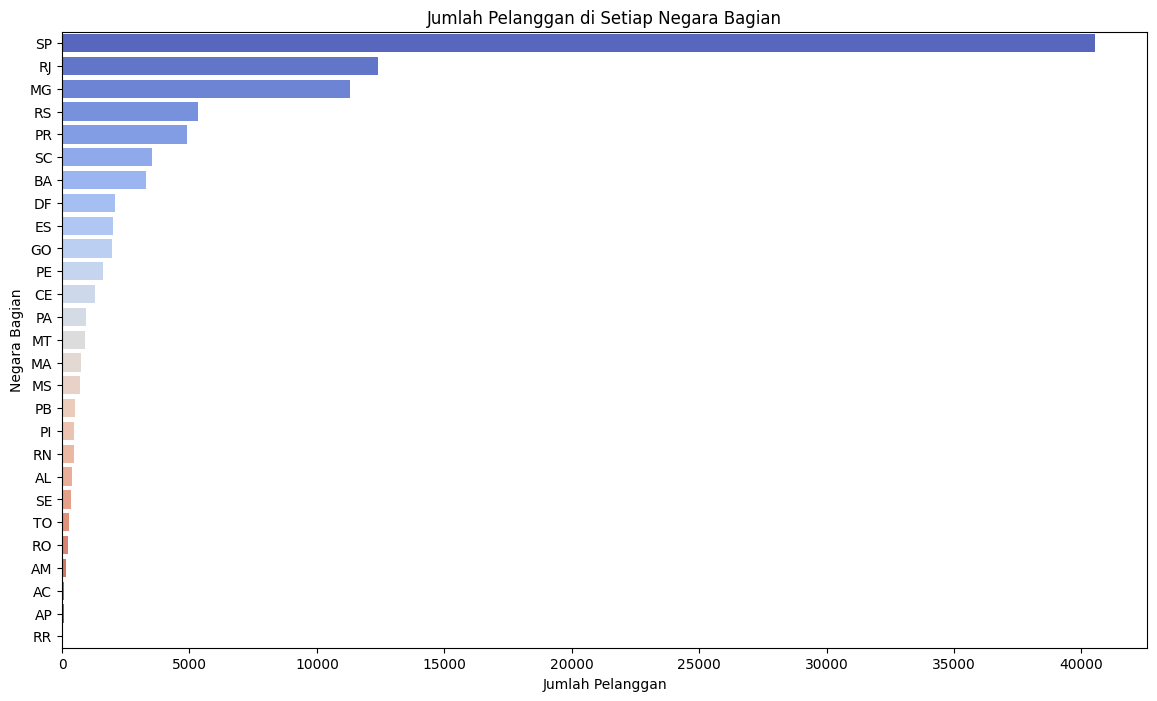

In [128]:
plt.figure(figsize=(14, 8))

sns.barplot(data=customer_in_state, x='customer', y='customer_state', palette="coolwarm", orient='h')
plt.xlabel('Jumlah Pelanggan')
plt.ylabel('Negara Bagian')
plt.title('Jumlah Pelanggan di Setiap Negara Bagian')

plt.show()

**Insight:**
<br> Dapat kita lihat berdasarkan visualisasi di atas, customer perusahaan kita paling banyak berada di negara bagian SP dengan jumlah customer menyentuh angka 40000an

#### Berdasarkan city

In [129]:
customer_in_city = product_customer.groupby(by='customer_city').customer_id.nunique().reset_index()
customer_in_city = customer_in_city.sort_values(by='customer_id', ascending=False)
customer_in_city.rename(columns={
    'customer_id' : 'customer'
}, inplace=True)
customer_in_city.head()

,customer_city,customer
3574,sao paulo,15046
3135,rio de janeiro,6641
451,belo horizonte,2683
556,brasilia,2076
1139,curitiba,1486


<ipython-input-130-f0932aad3d73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_in_city.head(10), x='customer_city', y='customer', palette="viridis")


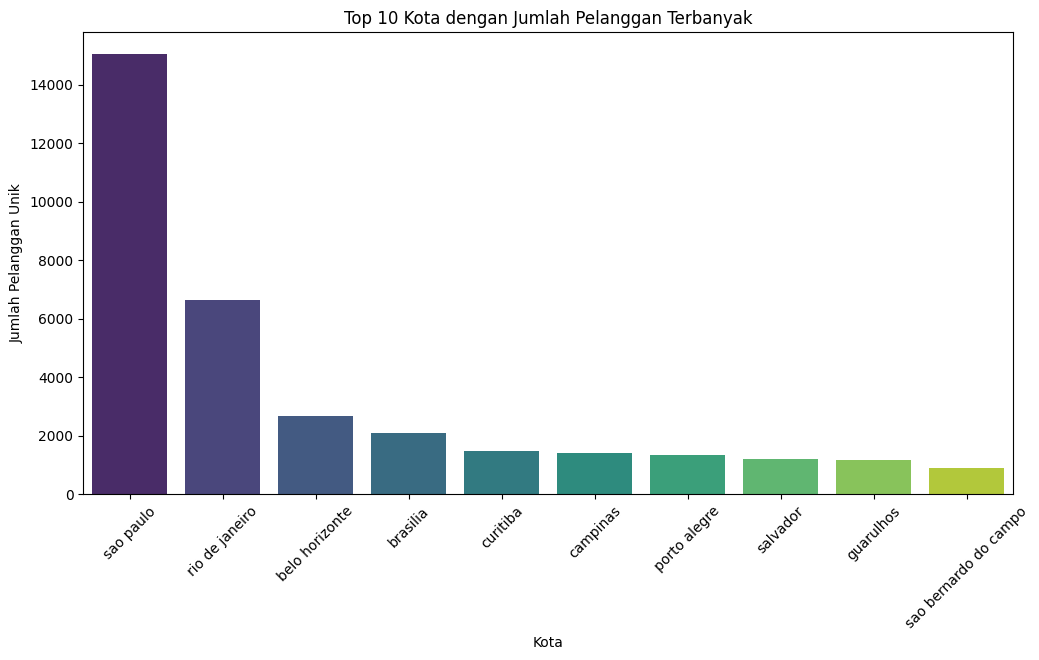

In [130]:
plt.figure(figsize=(12, 6))
sns.barplot(data=customer_in_city.head(10), x='customer_city', y='customer', palette="viridis")

plt.xlabel('Kota')
plt.ylabel('Jumlah Pelanggan Unik')
plt.title('Top 10 Kota dengan Jumlah Pelanggan Terbanyak')
plt.xticks(rotation=45)

plt.show()

**Insight:**
<br>Apabila kita mensortir pelanggan berdasarkan 10 kota dengan jumlah customer terbanyak di perusahaan kita. Kota yang paling banyak berada di Sao Paulo dengan jumlah customer di atas 14.000, lalu ada di kota rio de janeiro, belo horizonte, brasilia, curitiba, campinas, salvador, guarulhos, sao bernardo do campo

### Pertanyaan 2: Bagaimana dengan performa penjualan di perusahaan dalam beberapa bulan terakhir?

In [131]:
product_customer['order_approved_at'] = pd.to_datetime(product_customer['order_approved_at'])

monthly_order = product_customer.resample(rule='M', on='order_approved_at').agg({
    'order_id': 'nunique',
})

monthly_order.index = monthly_order.index.strftime('%Y-%m')
monthly_order = monthly_order.reset_index()
monthly_order.rename(columns={
    "order_id": "order",
}, inplace=True)
monthly_order.head()

<ipython-input-131-bd25663110f3>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order = product_customer.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order
0,2016-10,303
1,2016-11,0
2,2016-12,1
3,2017-01,732
4,2017-02,1658


In [132]:
monthly_order_df = product_customer.resample(rule='M', on='order_approved_at').agg({
    'order_id': 'nunique',
})
monthly_order_df.index = monthly_order_df.index.strftime('%B')
monthly_order_df = monthly_order_df.reset_index()
monthly_order_df.rename(columns={
    'order_id' : 'order',
}, inplace=True)
monthly_order_df = monthly_order_df.sort_values(by='order').drop_duplicates('order_approved_at', keep = 'last')
monthly_order_df.head()

<ipython-input-132-9ea74fc9c91d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_order_df = product_customer.resample(rule='M', on='order_approved_at').agg({


,order_approved_at,order
11,September,4168
12,October,4442
14,December,5597
21,July,6081
20,June,6111


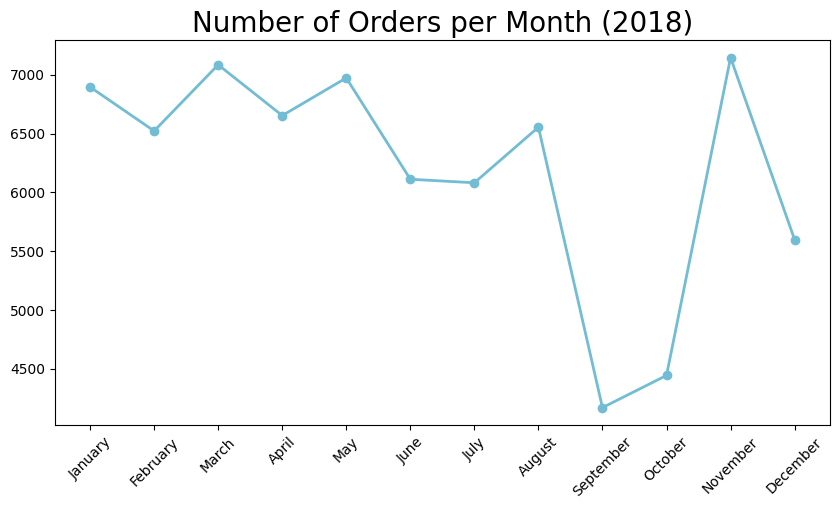

In [133]:
month = {
    'January' : 1,
    'February' : 2,
    'March' : 3,
    'April' : 4,
    'May' : 5,
    'June' : 6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12
}
monthly_order_df["month"] = monthly_order_df["order_approved_at"].map(month)
monthly_order_df = monthly_order_df.sort_values("month")
monthly_order_df = monthly_order_df.drop("month", axis=1)

plt.figure(figsize=(10,5))
plt.plot(monthly_order_df['order_approved_at'], monthly_order_df['order'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation = 45)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
<br> Performa penjualan kita pada beberapa bulan terakhir ini sedikit mengalami naik turun yang signifikan curam, apalagi penjualan dari bulan agustus ke bulan september, penjualan pada periode tersebut mengalami penurunan yang sangat banyak apabila dengan bulan bulan sebelumnya. Akan tetapi penjualan pada bulan berikutnya sedikit mulai membaik dan semakin membaik di saat periode bulan okteber-november. Di mana bulan november merupakan puncak penjualan tertinggi dibanding bulan-bulan lainnya.

### Pertanyaan 3: Produk apa yang paling banyak dan paling sedikit terjual?



In [134]:
total_order_item = product_customer.groupby(by='product_category_name').product_id.count().reset_index()
total_order_item = total_order_item.rename(columns={'product_id' : 'product'})
total_order_item = total_order_item.sort_values(by='product', ascending = False)
total_order_item.head(5)

,product_category_name,product
13,cama_mesa_banho,11847
11,beleza_saude,9944
32,esporte_lazer,8942
54,moveis_decoracao,8743
44,informatica_acessorios,8105


<ipython-input-135-562ffa3de11c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product', y='product_category_name', data = total_order_item.head(5), palette=colors, ax=ax[0])
<ipython-input-135-562ffa3de11c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product', y='product_category_name', data = total_order_item.sort_values(by='product', ascending=True).head(5), palette=colors, ax=ax[1])


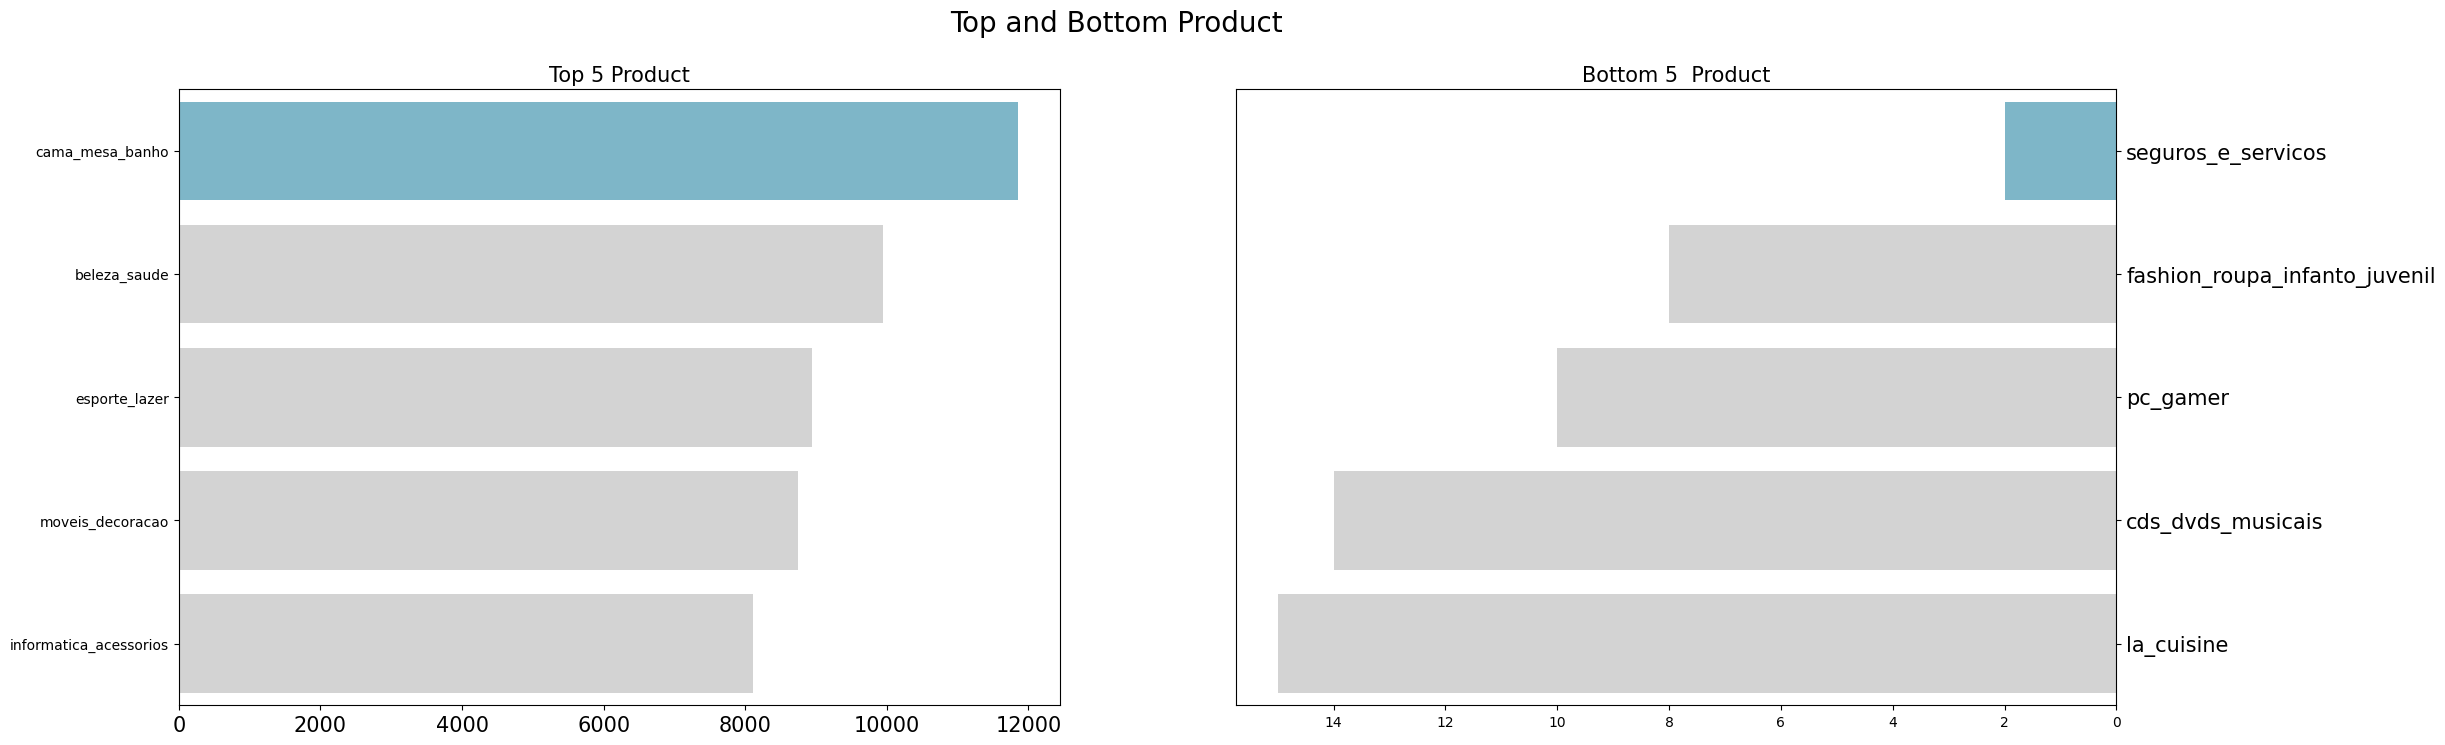

In [135]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 8))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='product', y='product_category_name', data = total_order_item.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Top 5 Product', loc='center', fontsize=15)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(x='product', y='product_category_name', data = total_order_item.sort_values(by='product', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Bottom 5  Product', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle('Top and Bottom Product', fontsize=20)
plt.show()

**Insight:**
<br> Berdasarkan hasil visualisasi di atas, Top produk unggulan yang paling banyak terjual adalah produk cama_mesa_banho. Sedangkan untuk produk yang paling sedikit terjual adalah produk seguros_e_servicos

### Pertanyaan 4: Produk apa yang paling sering dicancel oleh customer?

In [143]:
cancel_order = product_customer[product_customer['order_status'] == 'canceled']
delivered_order = product_customer[product_customer['order_status'] == 'delivered']
cancel_order_item = cancel_order.groupby(by='product_category_name').size().reset_index(name='total_cancel')
delivered_order_item = delivered_order.groupby(by='product_category_name').size().reset_index(name = 'total_delivered')

cancel_delivered_order = pd.merge(cancel_order_item, delivered_order_item, on = 'product_category_name')
cancel_delivered_order = cancel_delivered_order.sort_values(by='total_cancel', ascending=False)
cancel_delivered_order.rename(columns={
    'product_category_name' : 'produk'
}, inplace = True)
cancel_delivered_order.head()

,produk,total_cancel,total_delivered
46,utilidades_domesticas,57,7154
23,esporte_lazer,51,8736
29,informatica_acessorios,44,7927
8,beleza_saude,40,9747
35,moveis_decoracao,37,8558


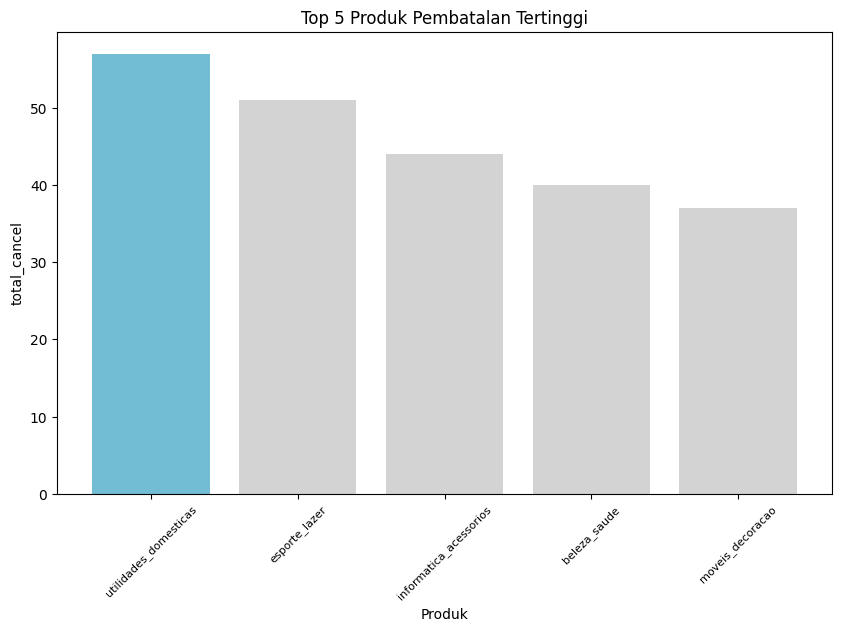

In [137]:
plt.figure(figsize=(10, 6))
plt.bar(cancel_delivered_order['produk'][:5], cancel_delivered_order['total_cancel'][:5], color=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.xlabel('Produk')
plt.ylabel('total_cancel')
plt.title('Top 5 Produk Pembatalan Tertinggi')
plt.xticks(size = 8, rotation=45)
plt.show()

**Insight:**
<br>Berdasarkan visualisasi di atas, produk yang paling banyak mengalami cancel oleh customer ditempati oleh produk utilidades_domesticas, lalu esporte_lazer, informatica_acessories, beleza_saude, moveis_decoracao

### Pertanyaan 5: Kota mana yang paling sering mengalami keterlambatan customer menerima paket?




In [147]:
late_order = product_customer[product_customer['delivery_status'] == 'late']
late_order_item = late_order.groupby(by='seller_city').size().reset_index(name='total_late')
late_order_item = late_order_item.sort_values(by='total_late', ascending = False)
late_order_item.head()

,seller_city,total_late
319,sao paulo,2690
141,ibitinga,881
272,ribeirao preto,341
312,sao jose do rio preto,268
294,santo andre,266


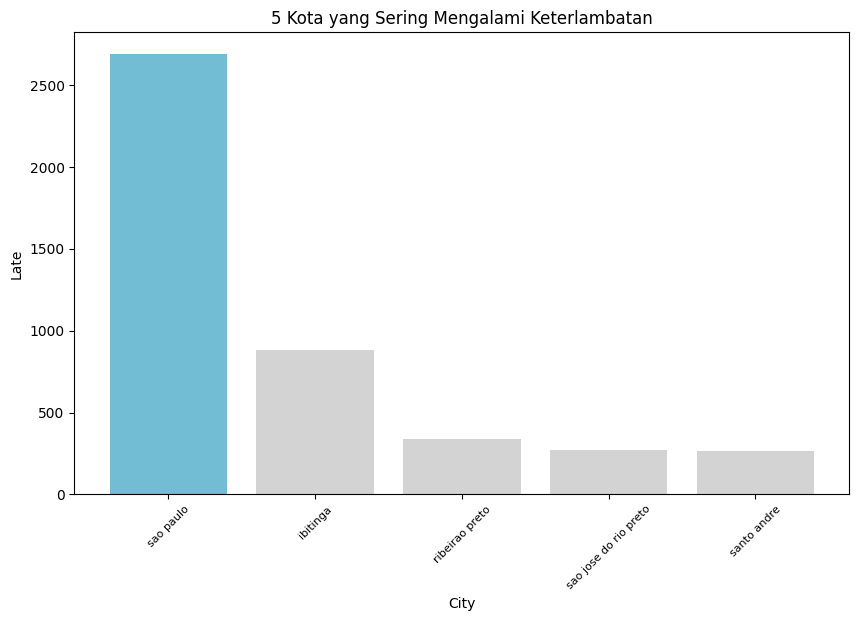

In [149]:
plt.figure(figsize=(10, 6))
plt.bar(late_order_item['seller_city'][:5], late_order_item['total_late'][:5], color=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.xlabel('City')
plt.ylabel('Late')
plt.title('5 Kota yang Sering Mengalami Keterlambatan')
plt.xticks(size = 8, rotation=45)
plt.show()

**Insight:**
<br> Berdasarkan hasil visualisasi, Kota-kota ini sering mengalami keterlambatan dalam perjalanan mengirim paket ke customer. Peringkat pertama dipegang oleh kota Sao Paulo, lalu peringkat kedua ada Ibitinga, lalu peringkat ketiga ada Ribeirao Preto, lalu peringkat keempat ada Sao Jose Do Rio Preto, dan peringkat kelima ada Santo Andre

## RFM ANALYSIS

In [140]:
rfm_df = product_customer.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp' : 'max',
    'order_id' : 'nunique',
    'payment_value' : 'sum'
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df['customer_id']  = rfm_df['customer_id'].str[-10:]
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = product_customer['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,ce98491703,1,114.74,293
1,fab4c27140,1,67.41,414
2,3d49edf079,1,195.42,552
3,ce7a26f1d5,1,179.35,383
4,5e70c7a9fb,1,107.01,154


<ipython-input-141-0ae2a58b3e91>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-141-0ae2a58b3e91>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-141-0ae2a58b3e91>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(b

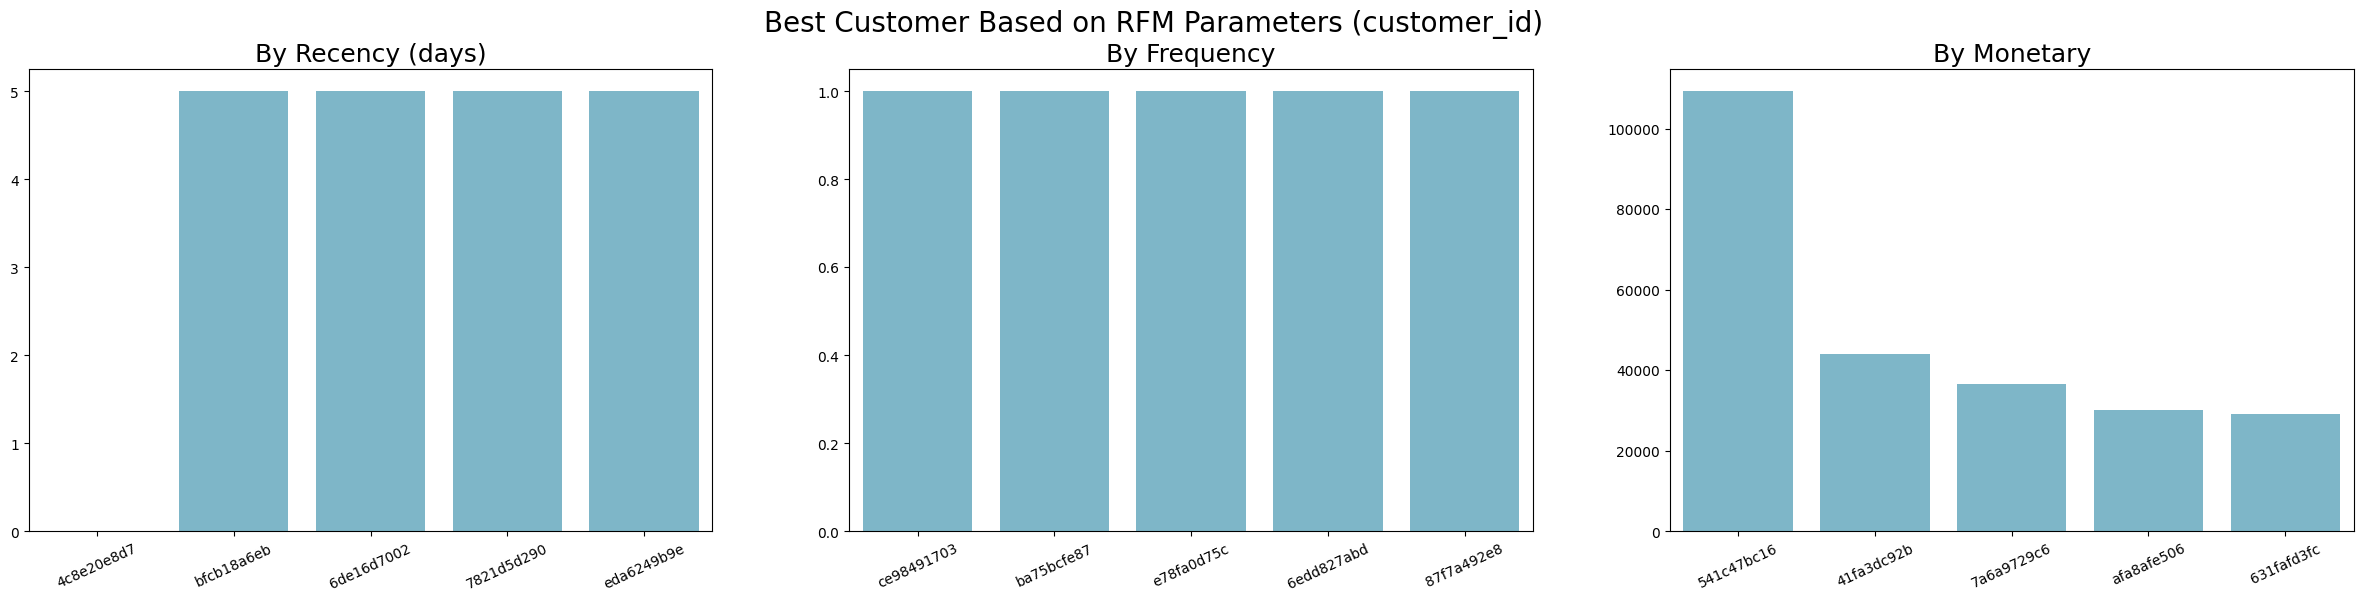

In [141]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=10, rotation = 25)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=10, rotation = 25)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=10, rotation = 25)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
<br> Berdasarkan hasil analisis lanjutan dengan menggunakan teknik analisis RFM, kita akan mengetahui jawaban dari ketiga pertanyaan terakhir.
- Untuk mengetahui kapan terakhir pelanggan melakukan transaksi kita dapat lihat pada visualisasi Recency.Di mana pelanggan ada yang baru saja melakukan transaksi dan ada yang 5 hari yang lalu melakukan transaksi
- Lalu untuk mengetahui seberapa sering melakukan belanja dalam beberapa bulan terakhir dapat kita lihat pada visualisasi bagian frequency bahwa 5 customer tersebut hanya melakukan 1 kali transaksi dalam beberapa bulan terakhir ini
- Sementara untuk mengetahui seberapa banyak uang yang dihabiskan oleh customer dalam beberapa bulan terakhir bisa kita lihat pada visualisasi monetary, di mana customer yang memiliki id 541c47bc16 paling banyak menghabiskan uangnya dalam beberapa bulan terakhir ini

## Conclusion

- Pertanyaan 1 : Bagaimana dengan demografis pelanggan pada perusahaan?
>Demografis pelanggan berdasarkan negara bagian, customer terbanyak berada di negara bagian SP. Sedangkan berdasarkan kota, customer terbanyak perusahaan berada di kota Sao Paulo
- Pertanyaan 2 : Bagaimana dengan performa penjualan di perusahaan dalam beberapa bulan terakhir?
>Performa penjualan perusahaan pada beberapa bulan terakhir ini sedikit mengalami naik turun, apalagi penjualan dari bulan agustus ke bulan september, penjualan pada periode tersebut mengalami penurunan yang sangat drastis apabila dibandingkan dengan bulan bulan sebelumnya. Akan tetapi penjualan pada bulan berikutnya mulai membaik dan semakin membaik di saat periode bulan okteber-november. Di mana bulan november merupakan puncak penjualan tertinggi dibanding bulan-bulan lainnya.
- Pertanyaan 3  : Produk apa yang paling banyak dan paling sedikit terjual?
> Berdasarkan hasil visualisasi di atas, Top produk unggulan yang paling banyak terjual adalah produk cama_mesa_banho. Sedangkan untuk produk yang paling sedikit terjual adalah produk seguros_e_servicos
- Pertanyaan 4 : Produk apa yang paling sering dicancel oleh customer?
> Produk yang paling banyak mengalami cancel oleh customer ditempati oleh produk utilidades_domesticas, lalu esporte_lazer, informatica_acessories, beleza_saude, moveis_decoracao
- Pertanyaan 5 : Kota mana yang paling sering mengalami keterlambatan customer menerima paket?
> Kota Sao Paulo menjadi kota yang kerap mengalami keterlambatan customernya dalam menerima paket
- Pertanyaan 6 : Kapan terakhir pelanggan melakukan transaksi?
>Customer ada yang baru saja melakukan transaksi dan ada yang 5 hari yang lalu melakukan transaksi
- Pertanyaan 7 : Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
>Customer hanya melakukan transaksi 1x dalam beberapa bulan terakhir
- Pertanyaan 8 : Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?
>customer yang memiliki id 541c47bc16 paling banyak menghabiskan uangnya dalam beberapa bulan terakhir ini dengan jumlah uang yang dihabiskannya 10000 lebih

In [142]:
product_customer.to_csv("e-commerce.csv", index=False)